In [1]:
# importing utilities
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from IPython.display import Image, display

# importing data science libraries
import pandas as pd

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
!nvidia-smi

Sat Apr 21 02:37:24 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.48                 Driver Version: 390.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:26:00.0  On |                  N/A |
|  0%   47C    P8    15W / 200W |    840MiB /  8118MiB |     23%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
fraud_dataset = pd.read_csv('./data/PS_20174392719_1491204439457_log.csv')
print("There are ", len(fraud_dataset), " samples")

There are  6362620  samples


In [4]:
fraud_dataset.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
# number of anomalies vs. regular transactions
print(fraud_dataset.isFraud.value_counts())
print(fraud_dataset.isFlaggedFraud.value_counts())
print(fraud_dataset.describe())

0    6354407
1       8213
Name: isFraud, dtype: int64
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.58577

Text(0.5,1,'Distribution of isFraud attribute values')

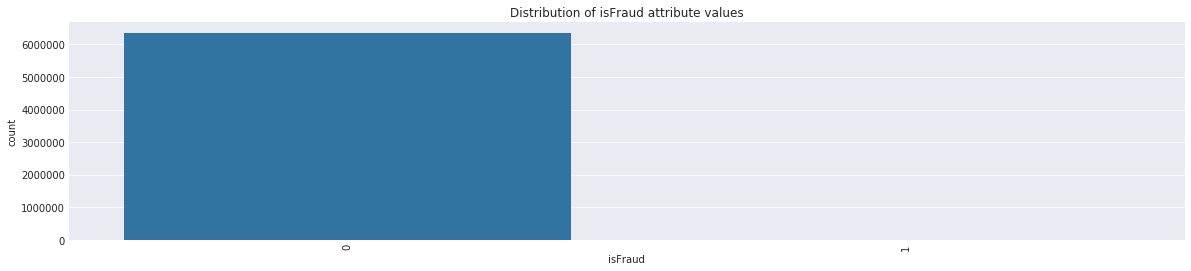

In [4]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['isFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of isFraud attribute values')

Text(0.5,1,'Distribution of isFlaggedFraud attribute values')

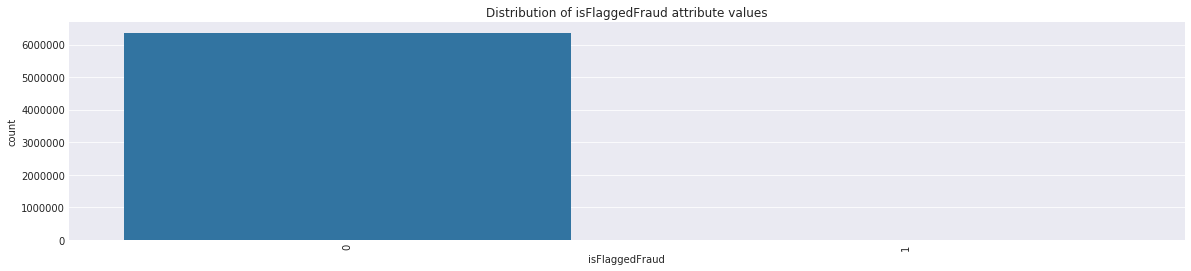

In [5]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
                       
# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['isFlaggedFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of isFlaggedFraud attribute values')

Text(0.5,1,'Positive Detections')

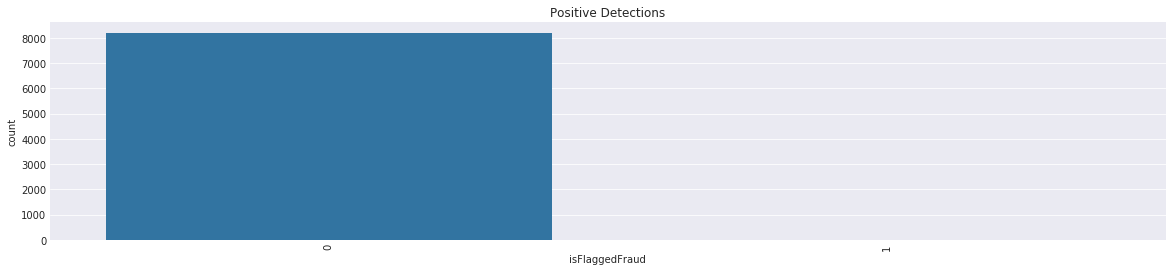

In [6]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
                       
# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]['isFlaggedFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Positive Detections')

Text(0.5,1,'False Negative Detections')

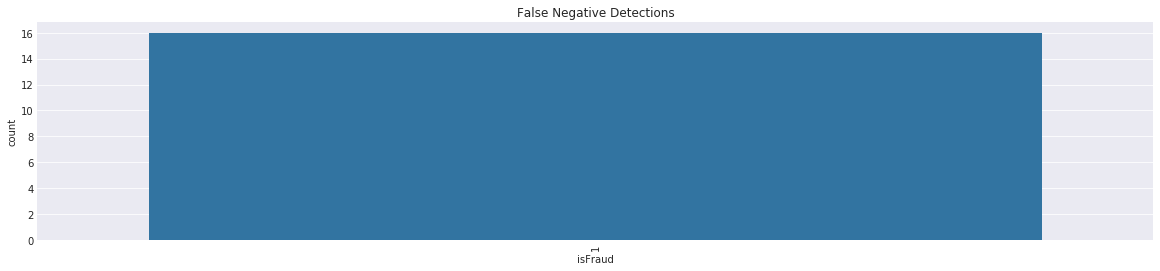

In [4]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFlaggedFraud"] == 0]['isFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('False Negative Detections')

Text(0.5,1,'Distribution of type attribute values')

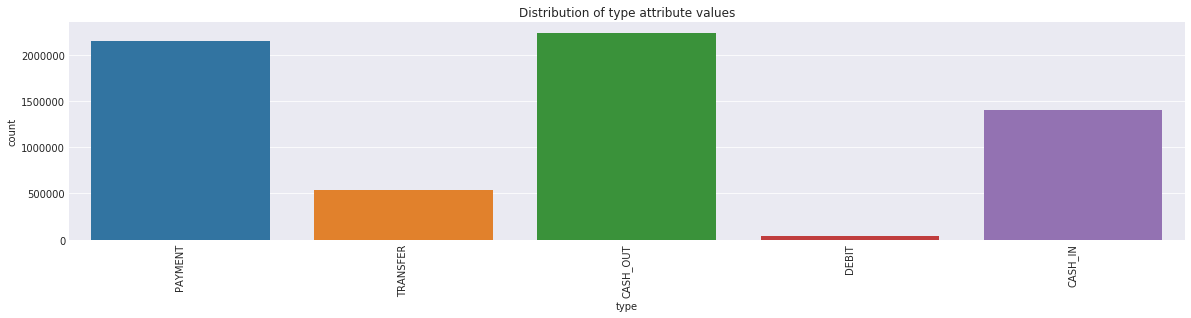

In [5]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['type'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of type attribute values')

Text(0.5,1,'Distribution of step attribute values')

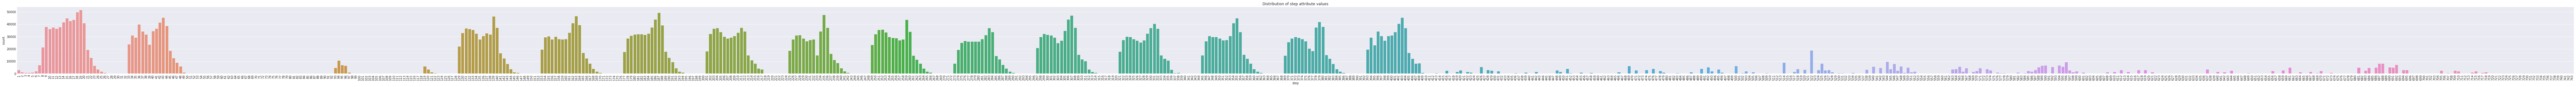

In [4]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['step'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of step attribute values')

Text(0.5,1,'Distribution of fraudulent step attribute values')

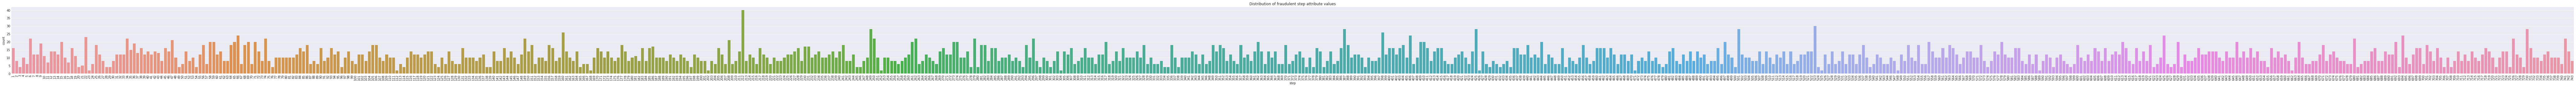

In [5]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["step"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of fraudulent step attribute values')

Text(0.5,1,'Distribution of fradulent type attribute values')

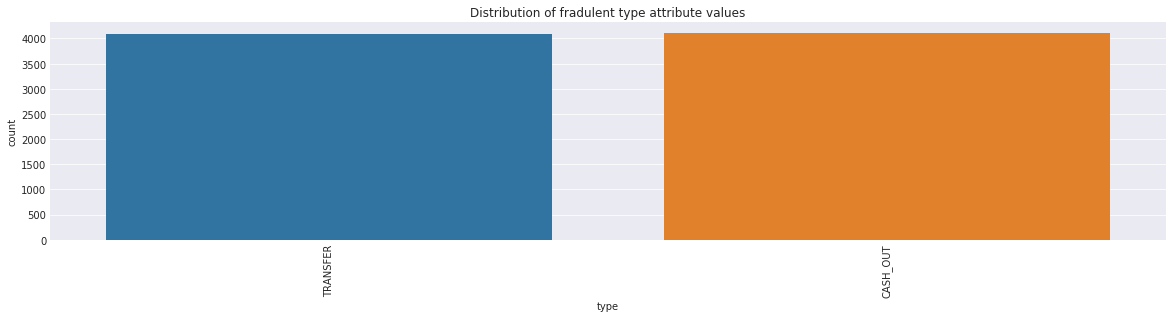

In [6]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["type"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of fradulent type attribute values')

Text(0.5,1,'Distribution of fradulent type attribute values')

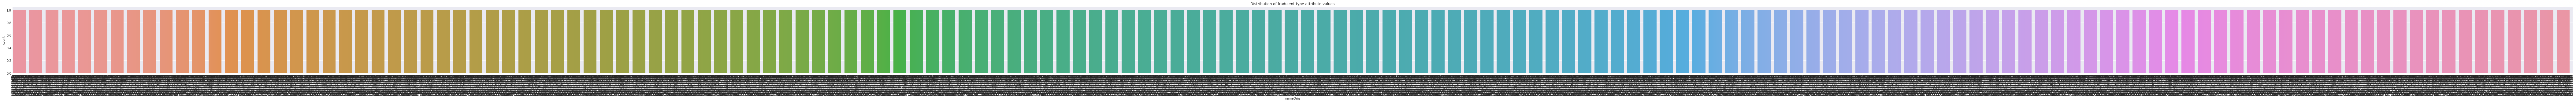

In [3]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["nameOrig"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of fradulent type attribute values')

Text(0.5,1,'Distribution of fradulent type attribute values')

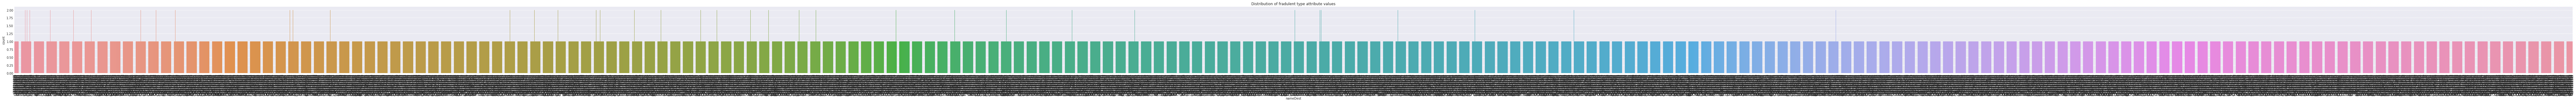

In [4]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["nameDest"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of fradulent type attribute values')

In [4]:
columns=['dest_type', "dest_id"]
dest_split = fraud_dataset.nameDest.str.split('(\d+)').tolist()
# print(dest_split)
dest_split = pd.DataFrame([x[:2] for x in dest_split], columns=columns)
dest_split[columns[1]] = pd.to_numeric(dest_split[columns[1]])
# encode categorical attributes into a binary one-hot encoded representation
nameDest_categ_transformed = pd.concat([pd.get_dummies(dest_split[columns[0]]), dest_split[columns[1]]], axis = 1)
nameDest_categ_transformed = nameDest_categ_transformed.rename(columns = {"C":"C_dest", "M":"M_dest"})

In [5]:
print(dest_split.describe())
print(nameDest_categ_transformed.describe())
print(nameDest_categ_transformed.head(10))

            dest_id
count  6.362620e+06
mean   1.073432e+09
std    6.204927e+08
min    2.000000e+00
25%    5.360919e+08
50%    1.072209e+09
75%    1.611938e+09
max    2.147483e+09
             C_dest        M_dest       dest_id
count  6.362620e+06  6.362620e+06  6.362620e+06
mean   6.618539e-01  3.381461e-01  1.073432e+09
std    4.730786e-01  4.730786e-01  6.204927e+08
min    0.000000e+00  0.000000e+00  2.000000e+00
25%    0.000000e+00  0.000000e+00  5.360919e+08
50%    1.000000e+00  0.000000e+00  1.072209e+09
75%    1.000000e+00  1.000000e+00  1.611938e+09
max    1.000000e+00  1.000000e+00  2.147483e+09
   C_dest  M_dest     dest_id
0       0       1  1979787155
1       0       1  2044282225
2       1       0   553264065
3       1       0    38997010
4       0       1  1230701703
5       0       1   573487274
6       0       1   408069119
7       0       1   633326333
8       0       1  1176932104
9       1       0   195600860


In [5]:
columns=['orig_type', "orig_id"]
orig_split = fraud_dataset.nameOrig.str.split('(\d+)').tolist()
orig_split = pd.DataFrame([x[:2] for x in orig_split], columns=columns)
# print(orig_split.head(10))
orig_split[columns[1]] = pd.to_numeric(orig_split[columns[1]])
# encode categorical attributes into a binary one-hot encoded representation
orig_type = pd.get_dummies(orig_split[columns[0]])
# print(type(orig_split))
M_orig = orig_type.copy(deep=True)
orig_type = orig_type.rename(columns = {"C":"C_orig"})
M_orig = M_orig.rename(columns = {"C":"M_orig"})
M_orig[:] = 0
nameOrig_categ_transformed = pd.concat([orig_type, M_orig, orig_split[columns[1]]], axis = 1)

In [7]:
print(nameOrig_categ_transformed.describe())
# print(nameOrig_categ_transformed.describe())
# print(nameOrig_categ_transformed.head(10))

          C_orig     M_orig       orig_id
count  6362620.0  6362620.0  6.362620e+06
mean         1.0        0.0  1.073759e+09
std          0.0        0.0  6.200783e+08
min          1.0        0.0  1.338000e+03
25%          1.0        0.0  5.370177e+08
50%          1.0        0.0  1.073741e+09
75%          1.0        0.0  1.610814e+09
max          1.0        0.0  2.147484e+09


In [6]:
type_categ_transformed = pd.get_dummies(fraud_dataset["type"])

In [9]:
print(type_categ_transformed.head(10))
print(type_categ_transformed.describe())

   CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
0        0         0      0        1         0
1        0         0      0        1         0
2        0         0      0        0         1
3        0         1      0        0         0
4        0         0      0        1         0
5        0         0      0        1         0
6        0         0      0        1         0
7        0         0      0        1         0
8        0         0      0        1         0
9        0         0      1        0         0
            CASH_IN      CASH_OUT         DEBIT       PAYMENT      TRANSFER
count  6.362620e+06  6.362620e+06  6.362620e+06  6.362620e+06  6.362620e+06
mean   2.199226e-01  3.516633e-01  6.511783e-03  3.381461e-01  8.375622e-02
std    4.141940e-01  4.774895e-01  8.043246e-02  4.730786e-01  2.770219e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.0000

In [7]:
transformed_datatset = pd.concat([fraud_dataset, type_categ_transformed, nameOrig_categ_transformed, nameDest_categ_transformed], axis = 1)
print(transformed_datatset.head(10))
print(transformed_datatset.describe())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud     ...      CASH_OUT  \
0  M1979787155             0.0            0.00        0     ...             0   
1  M20442822

In [8]:
# remove the "ground-truth" label and the detected label information for the following steps of the lab
print(fraud_dataset.shape)
print(transformed_datatset.shape)
drop_labels = ["type", "nameOrig", "nameDest", "isFraud", "isFlaggedFraud"]
for label in drop_labels:
    transformed_datatset.pop(label)
print(transformed_datatset.shape)

(6362620, 11)
(6362620, 22)
(6362620, 17)


In [9]:
print(transformed_datatset.head(10))

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64      170136.00       160296.36             0.0   
1     1   1864.28       21249.00        19384.72             0.0   
2     1    181.00         181.00            0.00             0.0   
3     1    181.00         181.00            0.00         21182.0   
4     1  11668.14       41554.00        29885.86             0.0   
5     1   7817.71       53860.00        46042.29             0.0   
6     1   7107.77      183195.00       176087.23             0.0   
7     1   7861.64      176087.23       168225.59             0.0   
8     1   4024.36        2671.00            0.00             0.0   
9     1   5337.77       41720.00        36382.23         41898.0   

   newbalanceDest  CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  C_orig  \
0            0.00        0         0      0        1         0       1   
1            0.00        0         0      0        1         0       1   
2            0.00        0   

In [10]:
print(transformed_datatset.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       CASH_IN      CASH_OUT  \
count    6.362620e+06    6.362620e+06  6.362620e+06  6.362620e+06   
mean     1.100702e+06    1.224996e+06  2.199226e-01  3.516633e-01   
std      3.399180e+06    3.674129e+06  4.141940e-01  4.774895e-01   
min      0.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
25%      0.000000e+00    0.000000e+00  0.0